## Instructions
Clean the above data sets with data processing code and then prepare them for modelling using neural networks. Build a model using the neural network model either using Keras or scikit-learn in Python or R. Understand the given problem and identify the respective inputs and outputs of the proposed model.

Consider the following steps to build and evaluate the model:

* Analyse and visualise the given data sets by reporting the distribution of class, distribution of features and any other visualisation you find appropriate.

* Investigate the effect of the number of hidden neurons (eg. 5, 10, 15, 20) for a single hidden layer

* Investigate the effect of learning rate (in case of SGD) for the selected data set (using the optimal number of hidden neurons).

* Investigate the effect on a different number of hidden layers (1, 2) with the optimal number of hidden neurons (from Part 4).

* Investigate the effect of Adam and SGD on training and test performance. 

* Evaluate the best model using a confusion matrix and show ROC and AUC for the classification problems.

Note that task 2 to 5 require 10 experimental runs (with different initial weights) for each case where you report mean and 95% confidence interval. You need to select the appropriate metrics, i.e., for classification report performance on the train and test data set. Use 60/40   percent train/test split for given data set (data split remains fixed across experiments).  

You should install required libraries and run the experiments on your personal computers and upload the results/code on Ed later.  Note that the code will not be evaluated. Marks will be given only for your report.  You can also submit a readme.txt with your submission that gives an overview of your files/code.  The reason we need your code is for plagiarism check in case if we are suspicious about your report. 

### Individual submission 

You treat the project as a classification problem. You show results for the ring age classified into 4 major groups, i.e. 4 output neurons using the following ring age groups:

Class 1: 0 - 7 years

Class 2: 8- 10 years

Class 3: 11 - 15 years

Class 4: Greater than 15 years

Include class distribution as Part 1 Data visualization. 

### Group Submission

You need to do all the Parts for Individual submission. Then you take the best model and build a regression model where you predict the age rather than classifying it into the 4 classes. Report RMSE mean and 95 % confidence interval of 10 experiments and compare SGD with Adam optimiser. Visualise the prediction vs actual of best model. You are free to decide which type of plot suits and can use a combination of plots for visualisation.

## From original study

age - length relationship

maximum diameter

    Name		    Data Type	Meas.	Description
    ----		    ---------	-----	-----------
    Sex             nominal               M, F, and I (infant)
    Length		  continuous	mm	  Longest shell measurement
    Diameter	    continuous	mm	  perpendicular to length
    Height		  continuous	mm	  with meat in shell
    Whole weight	continuous	grams   whole abalone
    Shucked weight  continuous	grams   weight of meat
    Viscera weight  continuous	grams   gut weight (after bleeding)
    Shell weight	continuous	grams   after being dried
    Rings		   integer               +1.5 gives the age in years

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from Packages.load_data import load_csv

## Load data
Load data.  
* Add 'Age' from 'Rings' + 1.5.
* Add 'AgeClass' from grouping 'Age'
* Change 'Sex' to category type

In [3]:
file = './data/abalone_data.csv'
column_names = ['Sex', 'Length_mm', 'Diameter_mm', 'Height_mm', 'Whole_weight_gms',
                'Shucked_weight_gms', 'Viscera_weight_gms', 'Shell_weight_gms', 'Rings']

raw = pd.read_csv(file, names=column_names)
data = load_csv()
df = data.copy()
orig = data.copy()
# remove 2 outliers from 'Height_mm'
df = df[df['Height_mm'] < 0.4]

From original csv, added 'Age', 'AgeClass', and changed 'Sex' to category


In [4]:
df.shape

(4175, 11)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Sex                 4175 non-null   int8    
 1   Length_mm           4175 non-null   float64 
 2   Diameter_mm         4175 non-null   float64 
 3   Height_mm           4175 non-null   float64 
 4   Whole_weight_gms    4175 non-null   float64 
 5   Shucked_weight_gms  4175 non-null   float64 
 6   Viscera_weight_gms  4175 non-null   float64 
 7   Shell_weight_gms    4175 non-null   float64 
 8   Rings               4175 non-null   int64   
 9   Age                 4175 non-null   float64 
 10  AgeClass            4175 non-null   category
dtypes: category(1), float64(8), int64(1), int8(1)
memory usage: 334.5 KB


In [105]:
raw.describe()

,Length_mm,Diameter_mm,Height_mm,Whole_weight_gms,Shucked_weight_gms,Viscera_weight_gms,Shell_weight_gms,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [28]:
raw.shape

(4177, 9)

In [5]:
continuous = ['Length_mm', 'Diameter_mm', 'Height_mm', 'Whole_weight_gms', 'Shucked_weight_gms', 'Viscera_weight_gms', 'Shell_weight_gms']
factors = [200, 235, 200, 210, 160, 200, 200]
for col,factor in zip(continuous, factors):
    orig[col] = orig[col] * factor

In [107]:
orig.head()

,Sex,Length_mm,Diameter_mm,Height_mm,Whole_weight_gms,Shucked_weight_gms,Viscera_weight_gms,Shell_weight_gms,Rings,Age,AgeClass
0,2,91.0,85.775,19.0,107.940,35.92,20.2,30.0,15,16.5,4
1,2,70.0,62.275,18.0,47.355,15.92,9.7,14.0,7,8.5,2
2,0,106.0,98.700,27.0,142.170,41.04,28.3,42.0,9,10.5,3
3,2,88.0,85.775,25.0,108.360,34.48,22.8,31.0,10,11.5,3
4,1,66.0,59.925,16.0,43.050,14.32,7.9,11.0,7,8.5,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Sex                 4175 non-null   int8    
 1   Length_mm           4175 non-null   float64 
 2   Diameter_mm         4175 non-null   float64 
 3   Height_mm           4175 non-null   float64 
 4   Whole_weight_gms    4175 non-null   float64 
 5   Shucked_weight_gms  4175 non-null   float64 
 6   Viscera_weight_gms  4175 non-null   float64 
 7   Shell_weight_gms    4175 non-null   float64 
 8   Rings               4175 non-null   int64   
 9   Age                 4175 non-null   float64 
 10  AgeClass            4175 non-null   category
dtypes: category(1), float64(8), int64(1), int8(1)
memory usage: 334.5 KB


* how many numerical vs categorical

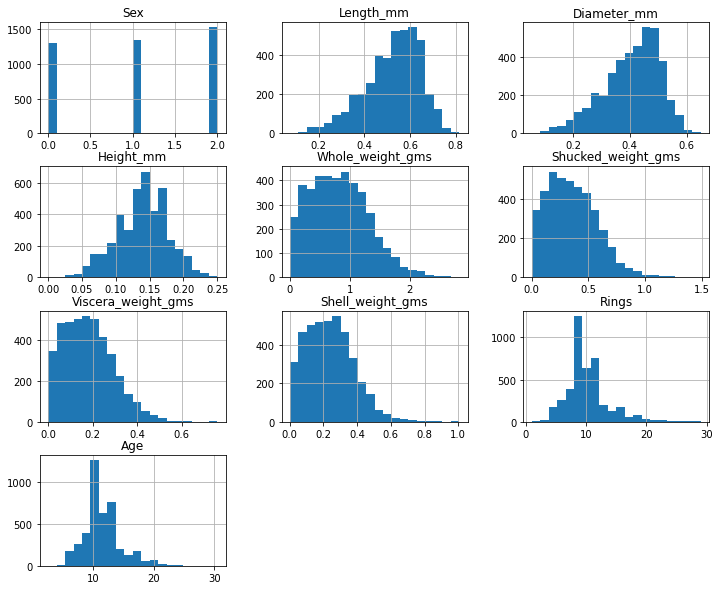

In [6]:
df.hist(bins=20, figsize=(12,10));

Histogram of (which features?) shows near normal (?log normal) distribution. ?Height has a very narrow distribution which might reflect a skewed distribution or some outliers.

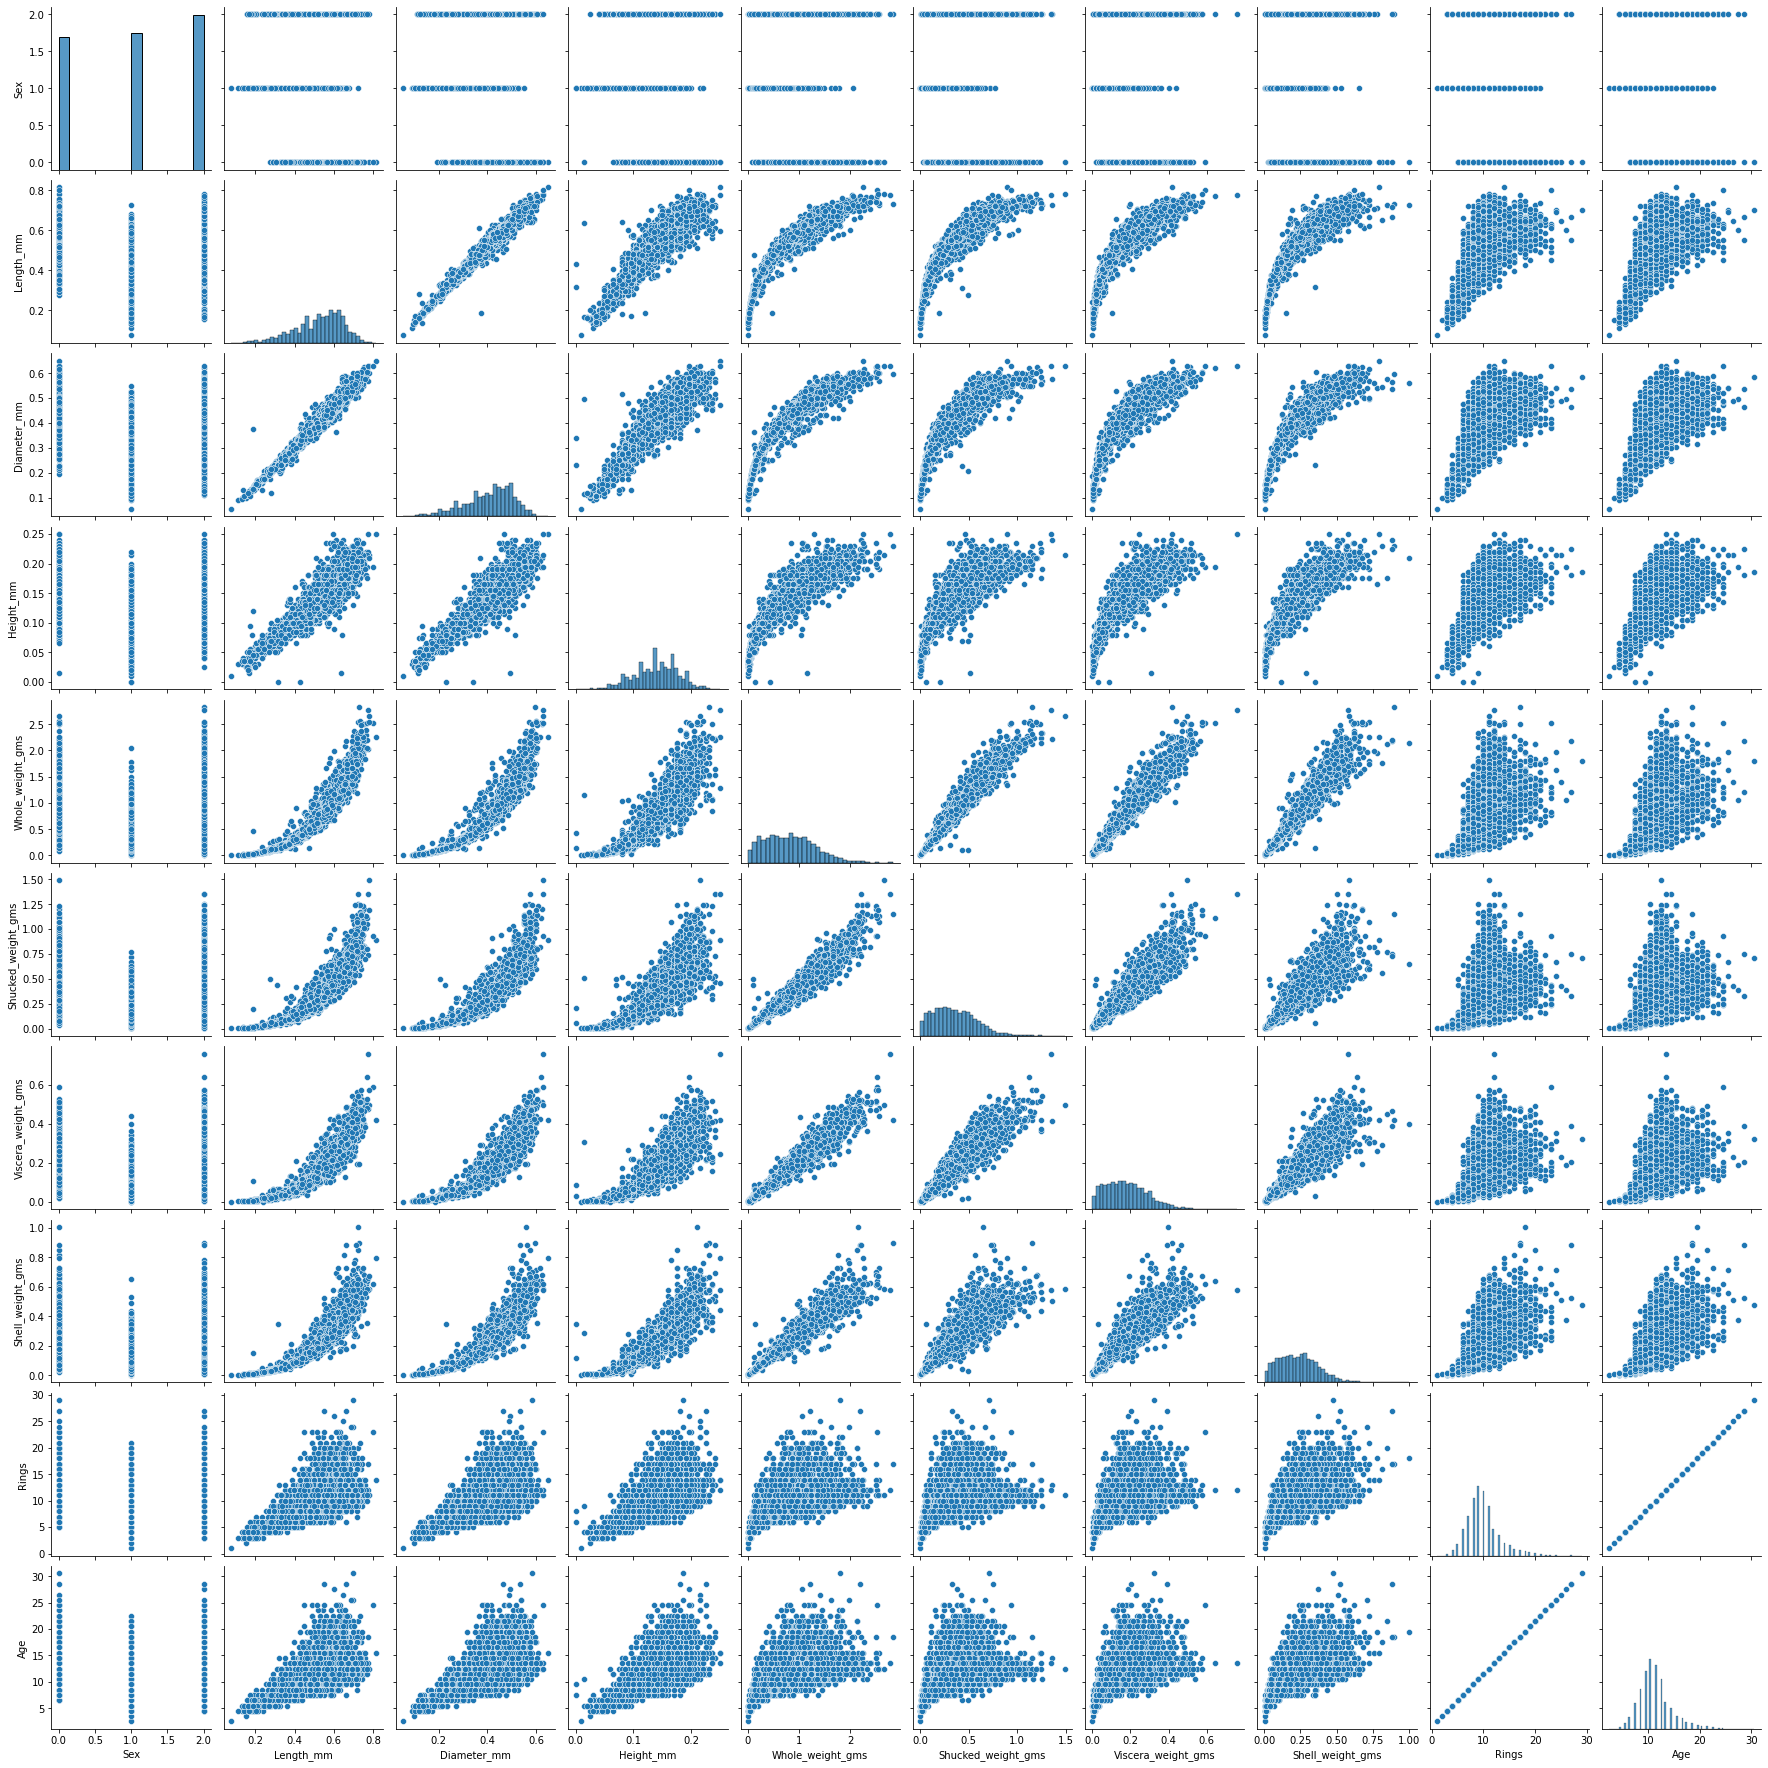

In [11]:
sns.pairplot(df)

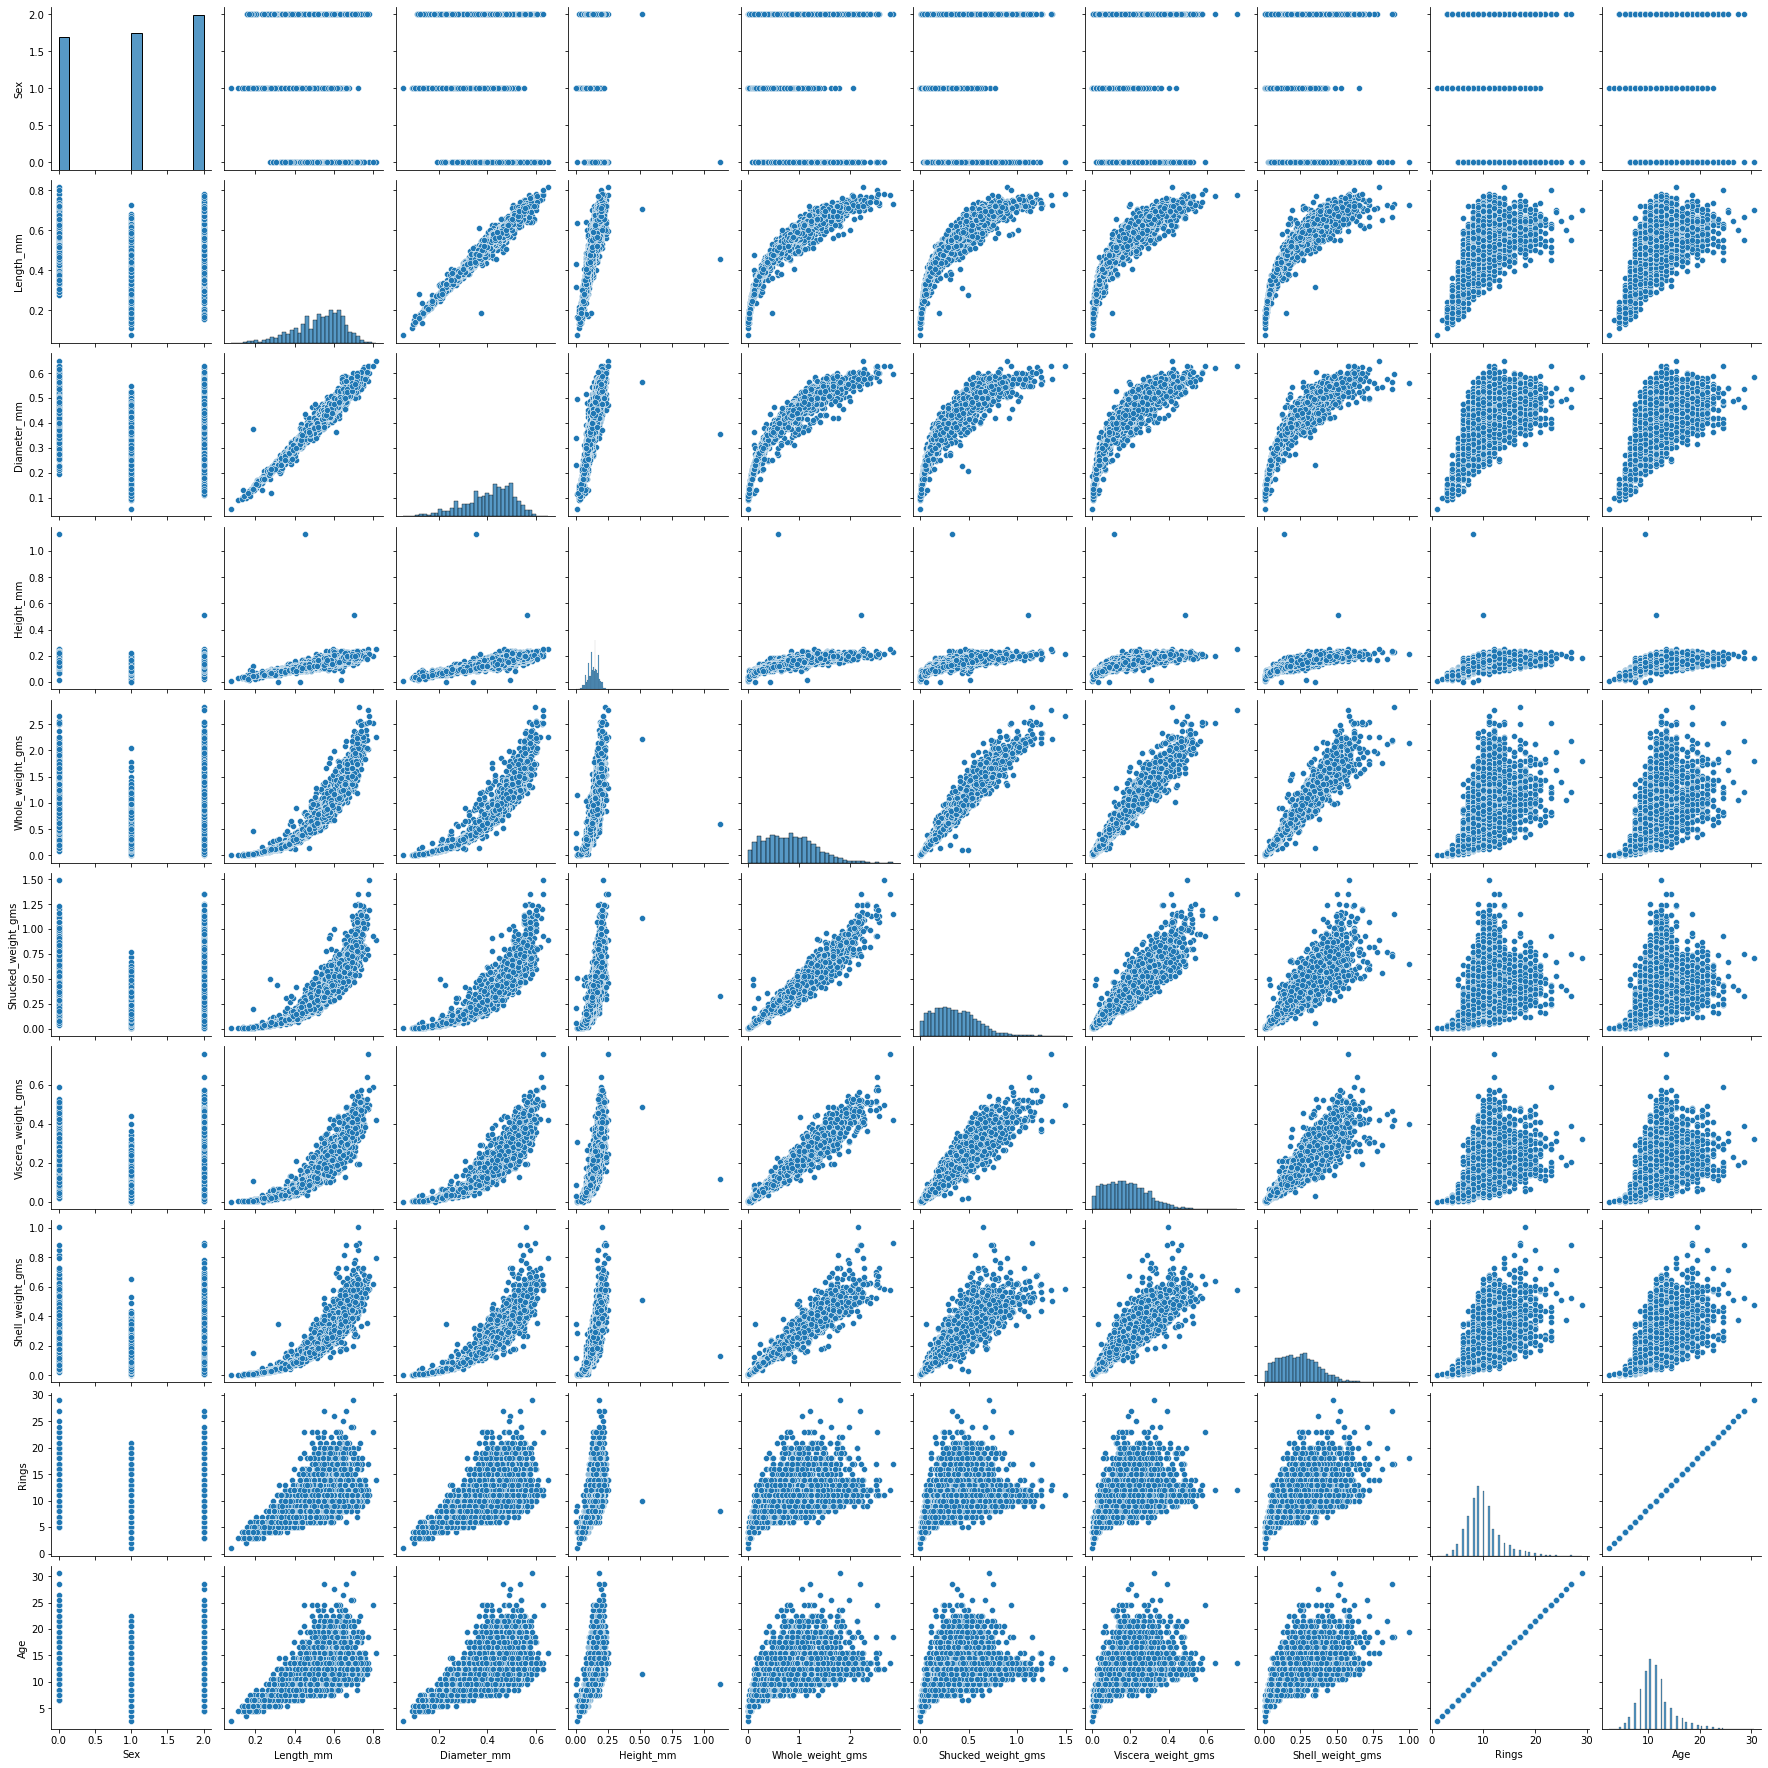

In [12]:
sns.pairplot(data)

### Comparison with Original Paper

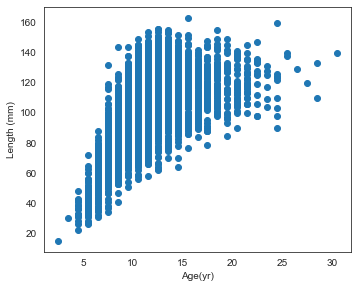

In [141]:
sns.set_style('white')
plt.figure(figsize=(5.5,4.5))
plt.scatter(orig['Age'], orig['Length_mm'])
plt.xlabel("Age(yr)")
plt.ylabel("Length (mm)")
plt.savefig("./images/age_length_compare.png")
#sns.jointplot(data=raw, x='Rings', y='Length_mm', hue='Sex')

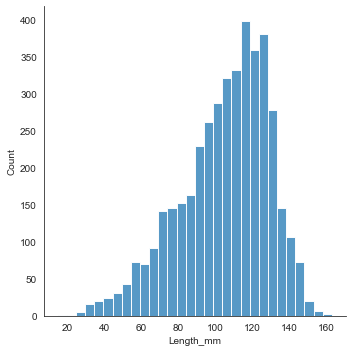

In [58]:
#(orig['Length_mm']*200).hist(bins=30)

sns.displot(orig['Length_mm'], kde=False, bins=30)

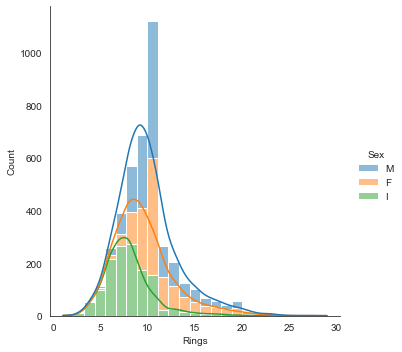

In [142]:
sns.displot(data=raw, x='Rings', kde=True, bins=25, multiple="stack",  hue='Sex')#, col="Sex")#)
plt.savefig("./images/age_dist.png")

<AxesSubplot:>

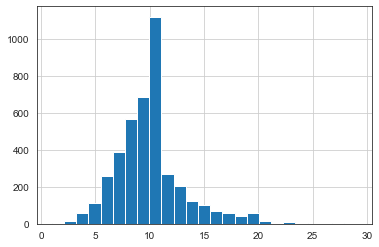

In [134]:
raw['Rings'].hist(bins=25, histtype='bar')

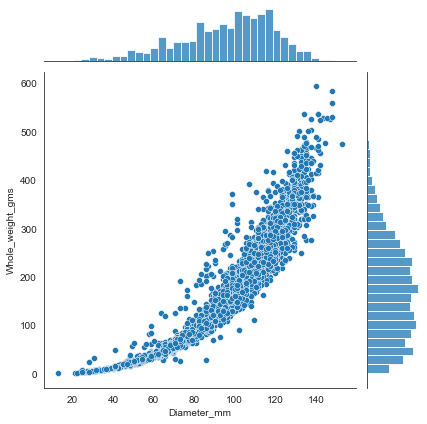

In [60]:
sns.jointplot(data=orig, x='Diameter_mm', y='Whole_weight_gms')

In [20]:
print(sns.__version__)

0.11.1


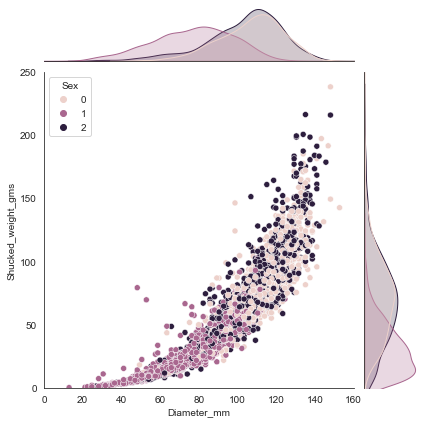

In [136]:
sns.jointplot(data=orig,
              x='Diameter_mm',
              y='Shucked_weight_gms',
              xlim=[0,160],
              ylim=[0,250],
             hue='Sex')

### Outliers

In [23]:
outliers1 = df[(df['Height_mm'] < 0.02) & (df['Diameter_mm'] > 0.2)]

outliers2 = data[data['Height_mm'] > 0.4]

outliers = pd.concat([outliers1, outliers2])

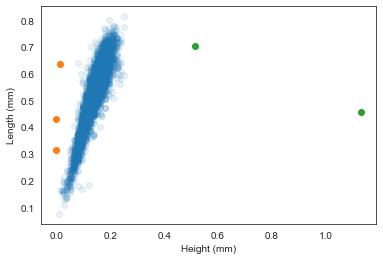

In [149]:
plt.scatter(df['Height_mm'], df['Length_mm'], alpha=0.1)
plt.scatter(outliers1['Height_mm'], outliers1['Length_mm'])
plt.scatter(outliers2['Height_mm'], outliers2['Length_mm'])
plt.xlabel("Height (mm)")
plt.ylabel("Length (mm)")
plt.savefig("./images/height_outliers.png")

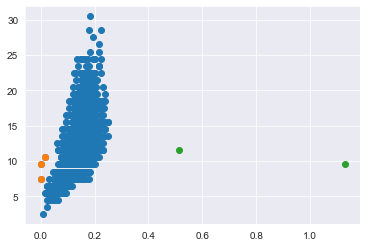

In [25]:
plt.scatter(df['Height_mm'], df['Age'])
plt.scatter(outliers1['Height_mm'], outliers1['Age'])
plt.scatter(outliers2['Height_mm'], outliers2['Age'])

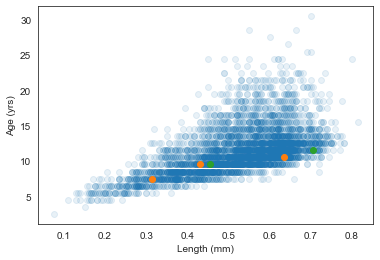

In [145]:
plt.scatter(df['Length_mm'], df['Age'], alpha=0.1)
plt.scatter(outliers1['Length_mm'], outliers1['Age'])
plt.scatter(outliers2['Length_mm'], outliers2['Age'])
plt.xlabel("Length (mm)")
plt.ylabel("Age (yrs)")
plt.savefig("./images/outlier_in_length_age.png")

<AxesSubplot:xlabel='Length_mm', ylabel='Age'>

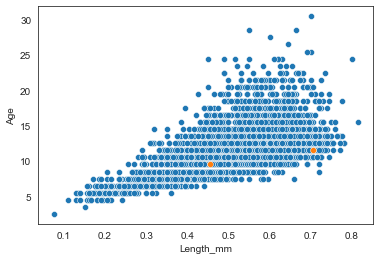

In [91]:
sns.scatterplot(data=data, x='Length_mm', y='Age')
sns.scatterplot(data=outliers2, x='Length_mm', y='Age')

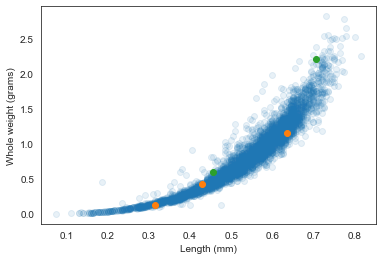

In [150]:
plt.scatter(df['Length_mm'], df['Whole_weight_gms'], alpha=0.1)
plt.scatter(outliers1['Length_mm'], outliers1['Whole_weight_gms'])
plt.scatter(outliers2['Length_mm'], outliers2['Whole_weight_gms'])
plt.xlabel("Length (mm)")
plt.ylabel("Whole weight (grams)")
plt.savefig("./images/outlier_in_length_wweight.png")

<AxesSubplot:xlabel='Length_mm', ylabel='Whole_weight_gms'>

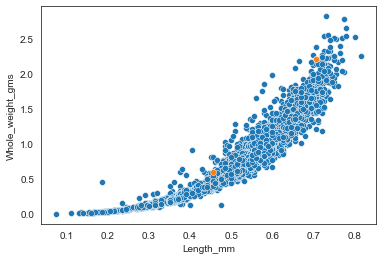

In [92]:
sns.scatterplot(data=data, x='Length_mm', y='Whole_weight_gms')
sns.scatterplot(data=outliers2, x='Length_mm', y='Whole_weight_gms')

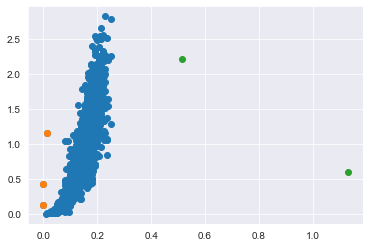

In [28]:
plt.scatter(df['Height_mm'], df['Whole_weight_gms'])
plt.scatter(outliers1['Height_mm'], outliers1['Whole_weight_gms'])
plt.scatter(outliers2['Height_mm'], outliers2['Whole_weight_gms'])

Distributions have good degree of linearity which some (?the spreading with x)

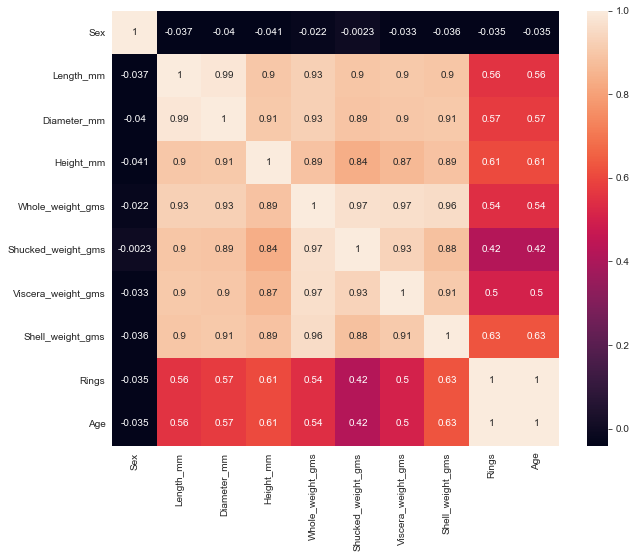

In [137]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.savefig("./images/corr_heat_map.png")

Shell weight, Viscera weight, Shucked weight, Whole weight, Diameter, Length, (Height), (Rings, Age), (Sex)
* Length - Diameter : 0.99
* Whole weight - Shucked weight : 0.97
* Whole weight - Viscera weight : 0.97
* Whole weight - Shell weight : 0.96
* Whole weight - Diameter : 0.93
* Whole weight - Length : 0.93
* 

* Correlations are high with all the weight breakdowns ('Whole', 'Shucked', etc)
* Very high correlation between length and diameter.

* Does Whole weight = Shell weight + Shucked weight + Viscera weight ?

### Standard scaling

Possible that all but 'Whole weight' is standard scale ????

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

In [127]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_norm = orig.drop(['Sex', 'Rings', 'Age', 'AgeClass'], axis=1)
X_norm = scaler.fit_transform(X_norm)

In [128]:
orig.columns

Index(['Sex', 'Length_mm', 'Diameter_mm', 'Height_mm', 'Whole_weight_gms',
       'Shucked_weight_gms', 'Viscera_weight_gms', 'Shell_weight_gms', 'Rings',
       'Age', 'AgeClass'],
      dtype='object')

In [129]:
X_norm = pd.DataFrame(X_norm, columns=['Length_mm', 'Diameter_mm', 'Height_mm', 'Whole_weight_gms',
       'Shucked_weight_gms', 'Viscera_weight_gms', 'Shell_weight_gms'])

In [130]:
X_norm

,Length_mm,Diameter_mm,Height_mm,Whole_weight_gms,Shucked_weight_gms,Viscera_weight_gms,Shell_weight_gms
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


In [123]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()

X_minmax = orig.drop(['Sex', 'Rings', 'Age', 'AgeClass'], axis=1)
X_minmax = scaler.fit_transform(X_minmax)

In [125]:
X_minmax = pd.DataFrame(X_minmax, columns=['Length_mm', 'Diameter_mm', 'Height_mm', 'Whole_weight_gms',
       'Shucked_weight_gms', 'Viscera_weight_gms', 'Shell_weight_gms'])

### Outliers
Outliers determined by number of standard deviations from mean (???).  
* remove
* retain ?

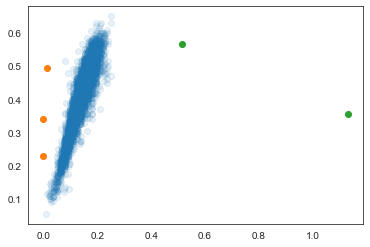

In [86]:
plt.scatter(data['Height_mm'], data['Diameter_mm'], alpha=0.1)
plt.scatter(outliers1['Height_mm'], outliers1['Diameter_mm'])
plt.scatter(outliers2['Height_mm'], outliers2['Diameter_mm'])

<AxesSubplot:xlabel='Height_mm', ylabel='Diameter_mm'>

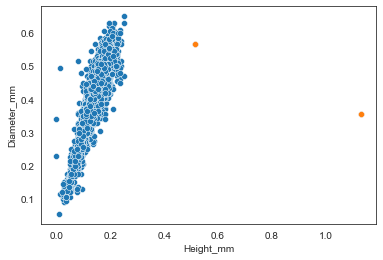

In [89]:
sns.scatterplot(data=data, x='Height_mm', y='Diameter_mm')
sns.scatterplot(data=outliers2, x='Height_mm', y='Diameter_mm')

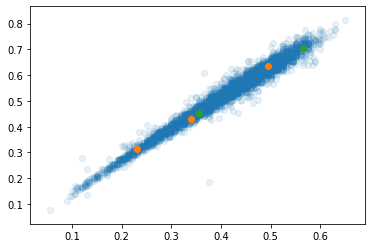

In [78]:
plt.scatter(data['Diameter_mm'], data['Length_mm'], alpha=0.1)
plt.scatter(outliers1['Diameter_mm'], outliers1['Length_mm'])
plt.scatter(outliers2['Diameter_mm'], outliers2['Length_mm'])

In [49]:
print(df.shape)
#outliers = df[(df['Height_mm'] > 0.02) & (df['Diameter_mm'] > 0.2)]
#data.drop(data[(data['Viscera weight']> 0.5) & (data['age'] < 20)].index, inplace=True)
#outliers

(4175, 11)


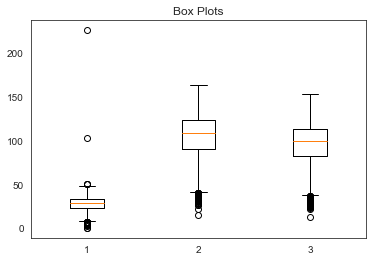

In [108]:
box_plots = [orig['Height_mm'], orig['Length_mm'], orig['Diameter_mm']]
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plots')
ax1.boxplot(box_plots);

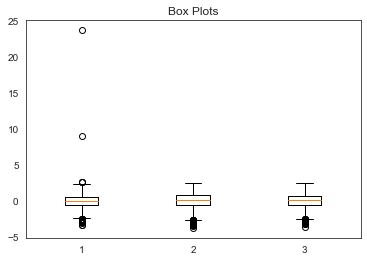

In [131]:
box_plots = [X_norm['Height_mm'], X_norm['Length_mm'], X_norm['Diameter_mm']]
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plots')
ax1.boxplot(box_plots);

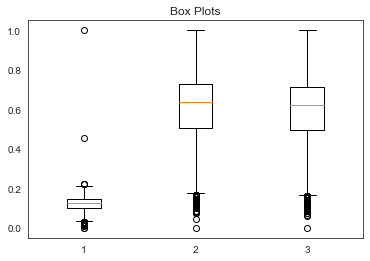

In [126]:
box_plots = [X_minmax['Height_mm'], X_minmax['Length_mm'], X_minmax['Diameter_mm']]
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plots')
ax1.boxplot(box_plots);

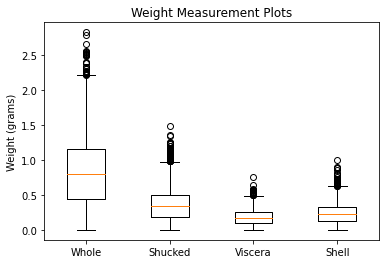

In [26]:
box_plots = [df['Whole_weight_gms'], df['Shucked_weight_gms'], df['Viscera_weight_gms'], df['Shell_weight_gms']]
fig1, ax1 = plt.subplots()
ax1.set_title('Weight Measurement Plots')
ax1.set_ylabel('Weight (grams)')
ax1.boxplot(box_plots);  # , vert=False
plt.xticks([1, 2, 3, 4], ['Whole', 'Shucked', 'Viscera', 'Shell']);
plt.savefig("./images/weight_dist_outliers.png")

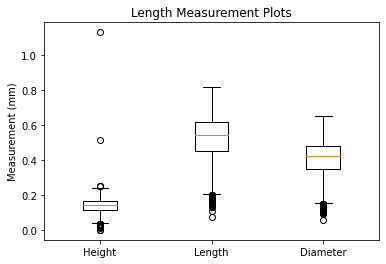

In [27]:
box_plots = [data['Height_mm'], data['Length_mm'], data['Diameter_mm']]
fig1, ax1 = plt.subplots()
ax1.set_title('Length Measurement Plots')
ax1.set_ylabel('Measurement (mm)')
ax1.boxplot(box_plots);
plt.xticks([1, 2, 3], ['Height', 'Length', 'Diameter']);
plt.savefig("./images/length_dist_outliers.png")

### Covariance

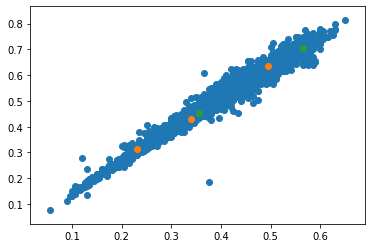

In [76]:
plt.scatter(df['Diameter_mm'], df['Length_mm'])
plt.scatter(outliers1['Diameter_mm'], outliers1['Length_mm'])
plt.scatter(outliers2['Diameter_mm'], outliers2['Length_mm'])

### Relationships
* look for relationships within groups (Age, Sex, ?, ?)

In [ ]:
plt.scatter(df['Length'], df['Age'], alpha=0.1)

In [ ]:
df['Sex'].value_counts()

In [ ]:
df.groupby('AgeClass')['Length', 'Height', 'Whole weight'].mean().plot(kind='bar')

In [ ]:
df.groupby('AgeClass').std()

In [ ]:
df.groupby('AgeClass').max()

In [ ]:
df.groupby('Sex').mean()

In [ ]:
df.groupby('Sex').max()

In [ ]:
df.groupby(['Rings', 'Sex']).mean()